In [ ]:
import pandas as pd

In [ ]:
df_original = pd.read_csv('/content/Music_Info.csv')

In [ ]:
df_original.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50683 non-null  object 
 1   name                 50683 non-null  object 
 2   artist               50683 non-null  object 
 3   spotify_preview_url  50683 non-null  object 
 4   spotify_id           50683 non-null  object 
 5   tags                 49556 non-null  object 
 6   genre                22348 non-null  object 
 7   year                 50683 non-null  int64  
 8   duration_ms          50683 non-null  int64  
 9   danceability         50683 non-null  float64
 10  energy               50683 non-null  float64
 11  key                  50683 non-null  int64  
 12  loudness             50683 non-null  float64
 13  mode                 50683 non-null  int64  
 14  speechiness          50683 non-null  float64
 15  acousticness         50683 non-null 

In [ ]:
df = df_original.iloc[:, [5]]

In [ ]:
df.head()

,tags
0,"rock, alternative, indie, alternative_rock, in..."
1,"rock, alternative, indie, pop, alternative_roc..."
2,"rock, alternative, alternative_rock, 90s, grunge"
3,"rock, alternative, indie, alternative_rock, in..."
4,"rock, alternative, indie, alternative_rock, in..."


In [ ]:
df.shape

(50683, 1)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(49556, 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49556 entries, 0 to 50682
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tags    49556 non-null  object
dtypes: object(1)
memory usage: 774.3+ KB


In [ ]:
def process_tags(tags):
    if pd.isna(tags) or tags.strip() == "":
        return []
    return [tag.strip().lower() for tag in tags.split(",")]

df = df.copy()

df["processed_tags"] = df["tags"].apply(process_tags)

all_tags = sorted(set(tag for tags in df["processed_tags"] for tag in tags))

tags_df = pd.DataFrame(0, index=df.index, columns=all_tags)
for tag in all_tags:
    tags_df[tag] = df["processed_tags"].apply(lambda tags: 1 if tag in tags else 0)

df = pd.concat([df, tags_df], axis=1).drop(columns=["processed_tags"])

print("Tags processed & One-Hot Encoded successfully!")

Tags processed & One-Hot Encoded successfully!


In [ ]:
df.shape

(49556, 101)

In [ ]:
df = df.drop(columns=['tags'])

In [ ]:
df.head()

,00s,60s,70s,80s,90s,acoustic,alternative,alternative_rock,ambient,american,...,ska,soul,soundtrack,swedish,symphonic_metal,synthpop,techno,thrash_metal,trance,trip_hop
0,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for col in df.columns:
    print(col)

00s
60s
70s
80s
90s
acoustic
alternative
alternative_rock
ambient
american
avant_garde
beautiful
black_metal
blues
blues_rock
british
britpop
chill
chillout
classic_rock
classical
country
cover
dance
dark_ambient
death_metal
doom_metal
downtempo
drum_and_bass
electro
electronic
emo
experimental
female_vocalists
folk
french
funk
german
gothic
gothic_metal
grindcore
grunge
guitar
hard_rock
hardcore
heavy_metal
hip_hop
house
idm
indie
indie_pop
indie_rock
industrial
instrumental
j_pop
japanese
jazz
lounge
love
male_vocalists
mellow
melodic_death_metal
metal
metalcore
new_age
new_wave
noise
nu_metal
oldies
piano
polish
pop
pop_rock
post_hardcore
post_punk
post_rock
power_metal
progressive_metal
progressive_rock
psychedelic
psychedelic_rock
punk
punk_rock
rap
reggae
rnb
rock
russian
screamo
singer_songwriter
ska
soul
soundtrack
swedish
symphonic_metal
synthpop
techno
thrash_metal
trance
trip_hop


In [ ]:
df.shape

(49556, 100)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
data = torch.tensor(df.values, dtype=torch.float32)

train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

batch_size = 128
train_dataset = TensorDataset(train_data, train_data)
val_dataset = TensorDataset(val_data, val_data)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
class SongEmbeddingModel(nn.Module):
    def __init__(self, input_dim=100, embedding_dim=32):
        super(SongEmbeddingModel, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, embedding_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(embedding_dim, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        embedding = self.encoder(x)
        reconstructed = self.decoder(embedding)
        return embedding, reconstructed

In [ ]:
model = SongEmbeddingModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 50
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        _, outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            _, outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    train_loss /= len(train_loader)
    val_loss /= len(val_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch+1}/{epochs}] - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

Epoch [1/50] - Train Loss: 0.0570, Val Loss: 0.0337
Epoch [2/50] - Train Loss: 0.0301, Val Loss: 0.0265
Epoch [3/50] - Train Loss: 0.0236, Val Loss: 0.0206
Epoch [4/50] - Train Loss: 0.0183, Val Loss: 0.0154
Epoch [5/50] - Train Loss: 0.0138, Val Loss: 0.0121
Epoch [6/50] - Train Loss: 0.0109, Val Loss: 0.0098
Epoch [7/50] - Train Loss: 0.0090, Val Loss: 0.0084
Epoch [8/50] - Train Loss: 0.0078, Val Loss: 0.0074
Epoch [9/50] - Train Loss: 0.0069, Val Loss: 0.0065
Epoch [10/50] - Train Loss: 0.0060, Val Loss: 0.0058
Epoch [11/50] - Train Loss: 0.0054, Val Loss: 0.0053
Epoch [12/50] - Train Loss: 0.0048, Val Loss: 0.0047
Epoch [13/50] - Train Loss: 0.0043, Val Loss: 0.0043
Epoch [14/50] - Train Loss: 0.0039, Val Loss: 0.0038
Epoch [15/50] - Train Loss: 0.0035, Val Loss: 0.0035
Epoch [16/50] - Train Loss: 0.0032, Val Loss: 0.0032
Epoch [17/50] - Train Loss: 0.0029, Val Loss: 0.0031
Epoch [18/50] - Train Loss: 0.0027, Val Loss: 0.0028
Epoch [19/50] - Train Loss: 0.0026, Val Loss: 0.0027
Ep

In [ ]:
torch.save(model.state_dict(), "song_embedding_model.pth")
print("Model training complete & saved!")

Model training complete & saved!


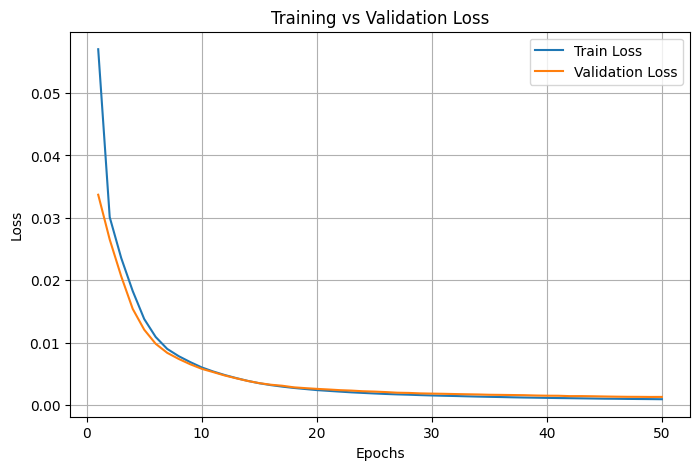

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs+1), train_losses, label="Train Loss")
plt.plot(range(1, epochs+1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()
plt.show()

In [ ]:
def generate_song_embeddings(model, df):
    model.eval()
    with torch.no_grad():
        song_embeddings = model(torch.tensor(df.values, dtype=torch.float32))

    return song_embeddings


song_embeddings = generate_song_embeddings(model, df)

In [ ]:
song_embeddings[0].shape

torch.Size([49556, 32])

In [ ]:
song_embeddings[1].shape

torch.Size([49556, 100])

In [ ]:
all_tags = list(df.columns)

In [ ]:
def preprocess_user_input(user_input, all_tags):
    user_tags = set(user_input.lower().split())
    user_vector = np.zeros(len(all_tags))

    for i, tag in enumerate(all_tags):
        if tag in user_tags:
            user_vector[i] = 1

    return torch.tensor(user_vector, dtype=torch.float32)

In [ ]:
user_input = "90s pop love"
user_vector = preprocess_user_input(user_input, all_tags)
print("User One-Hot Vector Shape:", user_vector.shape)

User One-Hot Vector Shape: torch.Size([100])


In [ ]:
model.eval()

with torch.no_grad():
    user_embedding = model(user_vector.unsqueeze(0))

print("User Embedding Shape:", user_embedding[0].shape)

User Embedding Shape: torch.Size([1, 32])


In [ ]:
print(user_embedding[0])

tensor([[-2.6478e+00, -2.2476e+00,  2.7258e+00,  5.6600e+00,  1.3894e+00,
          1.3620e-01,  4.1059e+00, -4.9163e-01, -9.3555e-01, -1.4454e-01,
         -5.8968e+00, -4.4089e+00,  4.3639e+00, -2.7661e-03, -2.7836e+00,
         -1.8466e+00, -4.1414e-01, -1.9594e-01, -1.5289e+00,  2.1656e+00,
          1.5971e+00,  5.4098e+00,  2.0112e+00, -1.3831e+00,  1.7829e+00,
          2.6417e-01,  1.8918e+00, -2.4173e+00,  3.6231e-01,  4.2163e+00,
          7.2864e+00, -2.3911e+00]])


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_songs(user_embedding, song_embeddings, df, df_original, top_n=5):

    user_embedding_np = user_embedding[0].numpy()
    song_embeddings_np = song_embeddings[0].numpy()

    similarities = cosine_similarity(user_embedding_np.reshape(1, -1), song_embeddings_np)[0]

    top_indices = np.argsort(similarities)[-top_n:][::-1]

    recommended_songs = pd.DataFrame(df_original.iloc[top_indices][["name", "artist", "spotify_preview_url", "spotify_id"]])

    return recommended_songs

top_recommendations = recommend_songs(user_embedding, song_embeddings, df, df_original, top_n=5)
top_recommendations

,name,artist,spotify_preview_url,spotify_id
24688,Magic Pie,Oasis,https://p.scdn.co/mp3-preview/c10176a3b7d9cf7d...,1pLIZDnZutv7YmEss2z2Dy
24615,Cemetary Gates,Between the Buried and Me,https://p.scdn.co/mp3-preview/07659a2c89fed15e...,0mkO2vOul79EdfSqyMxvUI
24753,Trouble in the Message Centre,Blur,https://p.scdn.co/mp3-preview/2e9bc9fc55ad1163...,6m4me4M9g0ncicsh6jQUMv
6764,Potential Breakup Song,Aly & AJ,https://p.scdn.co/mp3-preview/3a58cdfe804bb568...,11dxtPJKR4E0wlSr0A0t47
24714,Not An Addict,K's Choice,https://p.scdn.co/mp3-preview/0deb81736c09dbe2...,08L7HaPPkBbaw9KL1jlFGc


In [ ]:
from IPython.core.display import display, HTML

top_song_url = top_recommendations.iloc[0]["spotify_preview_url"]
display(HTML(f'<a href="{top_song_url}" target="_blank">Play Top Song</a>'))

In [ ]:
print(all_tags)

['00s', '60s', '70s', '80s', '90s', 'acoustic', 'alternative', 'alternative_rock', 'ambient', 'american', 'avant_garde', 'beautiful', 'black_metal', 'blues', 'blues_rock', 'british', 'britpop', 'chill', 'chillout', 'classic_rock', 'classical', 'country', 'cover', 'dance', 'dark_ambient', 'death_metal', 'doom_metal', 'downtempo', 'drum_and_bass', 'electro', 'electronic', 'emo', 'experimental', 'female_vocalists', 'folk', 'french', 'funk', 'german', 'gothic', 'gothic_metal', 'grindcore', 'grunge', 'guitar', 'hard_rock', 'hardcore', 'heavy_metal', 'hip_hop', 'house', 'idm', 'indie', 'indie_pop', 'indie_rock', 'industrial', 'instrumental', 'j_pop', 'japanese', 'jazz', 'lounge', 'love', 'male_vocalists', 'mellow', 'melodic_death_metal', 'metal', 'metalcore', 'new_age', 'new_wave', 'noise', 'nu_metal', 'oldies', 'piano', 'polish', 'pop', 'pop_rock', 'post_hardcore', 'post_punk', 'post_rock', 'power_metal', 'progressive_metal', 'progressive_rock', 'psychedelic', 'psychedelic_rock', 'punk', 'p

In [ ]:
import pickle

torch.save(song_embeddings, "song_embeddings.pth")

df.to_pickle("df.pkl")

print("song_embeddings and df saved successfully!")

song_embeddings and df saved successfully!


In [ ]:
df.describe()

,00s,60s,70s,80s,90s,acoustic,alternative,alternative_rock,ambient,american,...,ska,soul,soundtrack,swedish,symphonic_metal,synthpop,techno,thrash_metal,trance,trip_hop
count,49556.000000,49556.000000,49556.000000,49556.000000,49556.000000,49556.000000,49556.000000,49556.000000,49556.000000,49556.000000,...,49556.000000,49556.000000,49556.000000,49556.000000,49556.000000,49556.000000,49556.000000,49556.000000,49556.000000,49556.000000
mean,0.035899,0.031237,0.036403,0.046553,0.043688,0.041226,0.126604,0.083481,0.051679,0.028715,...,0.021975,0.037897,0.026798,0.024982,0.016951,0.024538,0.023630,0.024518,0.019372,0.032630
std,0.186040,0.173960,0.187293,0.210682,0.204402,0.198815,0.332532,0.276611,0.221380,0.167006,...,0.146604,0.190948,0.161494,0.156071,0.129087,0.154714,0.151894,0.154651,0.137830,0.177667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_mean = df.describe().loc["mean"].sort_values(ascending=False)
top_3_cols = df_mean.head(3)
print(top_3_cols)

rock          0.215594
indie         0.147046
electronic    0.133062
Name: mean, dtype: float64
